# Building dataframe


Import needed library for learning model

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


Build dataframe for training set

In [2]:
dataframe = pd.read_csv('C:\\Users\\LamPhuss\\Code\\Python\\ML_Projects-main\\ML_Projects-main\\src\\divde\\output_files_0.csv')
dataframe.head()

,model,car_price,car_title,car_sub_title,car_attention_grabber,car_specs,year,reg,engine_vol,engine_size
0,Cobra,89995,AC Cobra,4.9 MK IV CRS 2dr,GENUINE AC COBRA CRS 522 BHP,"2001 (X reg), Convertible, 14,400 miles, 4.9L,...",2001.0,X reg,4.9,225.0
1,Cobra,92500,AC Cobra,378 - MkIV,PHYSICAL CAR!,"2019 (T reg), Convertible, 650 miles, Manual, ...",2019.0,T reg,NaN,NaN
2,Cobra,109995,AC Cobra,MK1V 212 SC. 3.5 V8 350 BHP LOTUS TWIN TURBO. ...,FULL CARBON FIBRE BODY.,"2000 (X reg), Convertible, 21,600 miles, 3.5L,...",2000.0,X reg,3.5,NaN
3,Cobra,124950,AC Cobra,302 MKIV 2dr,ABSOLUTELY STUNNING,"1989 (F reg), Convertible, 2,750 miles, Manual...",1989.0,F reg,NaN,NaN
4,Cobra,124950,AC Cobra,302 MKIV With Factory Lightweight Engine 5.0 2dr,'STAGE 3' SVO ENGINE,"1989 (E reg), Convertible, 15,142 miles, 5.0L,...",1989.0,E reg,5.0,NaN


# Data Analysis and Preprocessing

## Check collumns and shapes in dataframe

In [3]:
dataframe.columns

Index(['model', 'car_price', 'car_title', 'car_sub_title',
       'car_attention_grabber', 'car_specs', 'year', 'reg', 'engine_vol',
       'engine_size'],
      dtype='object')

we can drop first column since it does not affect the price.

In [4]:
print("There are " + str(dataframe.shape[0]) + " rows and " + str(dataframe.shape[1]) + " columns")

There are 409228 rows and 10 columns


## Describe some basic statistical values

In [5]:
dataframe.describe()

,car_price,year,engine_vol,engine_size
count,4.092280e+05,382265.000000,402894.000000,407593.000000
mean,2.174495e+04,2015.995589,1.959560,182.815122
std,2.465361e+04,6.408385,0.828402,99.492038
min,3.000000e+02,32.000000,0.500000,1.000000
25%,9.293750e+03,2014.000000,1.500000,120.000000
50%,1.600000e+04,2017.000000,2.000000,150.000000
75%,2.649500e+04,2019.000000,2.000000,200.000000
max,3.199830e+06,2022.000000,8.300000,986.000000


## Describe summary of data frame 

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409228 entries, 0 to 409227
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   model                  408979 non-null  object 
 1   car_price              409228 non-null  int64  
 2   car_title              409228 non-null  object 
 3   car_sub_title          408996 non-null  object 
 4   car_attention_grabber  367808 non-null  object 
 5   car_specs              409228 non-null  object 
 6   year                   382265 non-null  float64
 7   reg                    370859 non-null  object 
 8   engine_vol             402894 non-null  float64
 9   engine_size            407593 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 31.2+ MB


## Handling outliers

In [7]:
train_outliers=dataframe.select_dtypes(include=['int', 'float'])

train_outliers.head()


,car_price,year,engine_vol,engine_size
0,89995,2001.0,4.9,225.0
1,92500,2019.0,NaN,NaN
2,109995,2000.0,3.5,NaN
3,124950,1989.0,NaN,NaN
4,124950,1989.0,5.0,NaN


In [8]:
dataframe.select_dtypes(include=['int', 'float']).columns.tolist()


['car_price', 'year', 'engine_vol', 'engine_size']

In [9]:
train_outliers = dataframe.filter(['car_price', 'year', 'engine_vol', 'engine_size'] ,axis=1)

In [10]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    outliers = dataframe[(dataframe[col] < range_low) | (dataframe[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))
    

NUmber of outliers in car_price is : 26816
NUmber of outliers in year is : 12771
NUmber of outliers in engine_vol is : 70060
NUmber of outliers in engine_size is : 33047


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart

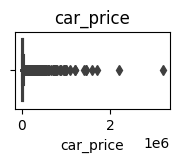

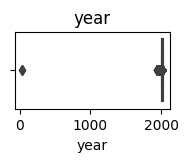

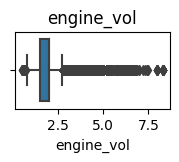

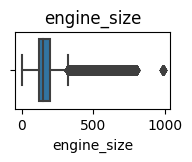

In [11]:

for col in train_outliers:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=train_outliers[col], whis=1.5)
    plt.title(col)
    plt.show()

Replace all outliers

In [12]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    dataframe = dataframe[(dataframe[col] >= range_low) & (dataframe[col] <= range_high)]
    outliers = dataframe[(dataframe[col] < range_low) | (dataframe[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))

NUmber of outliers in car_price is : 0
NUmber of outliers in year is : 0
NUmber of outliers in engine_vol is : 0
NUmber of outliers in engine_size is : 0


In [13]:
dataframe.shape

(298840, 10)

## Checking Data Imbalance *

In [16]:
train_data_imbalance=dataframe.select_dtypes(include=['object'])
train_data_imbalance.head()


,make,model,variant,car_badges,car_title,car_sub_title,car_attention_grabber,car_specs,car_seller,car_seller_location,reg,body_type,engine_size_unit,transmission,feul_type
8,Abarth,124 Spider,GT,"'Good price', 'Approved used', 'Finance availa...",Abarth 124 Spider,1.4 T MultiAir 2dr Auto,Reserve Online for \xa399,"2019 (19 reg), Convertible, 10,313 miles, 1.4L...",Glyn Hopkin Fiat and MG Milton Keynes,milton keynes,19 reg,convertible,bhp,automatic,petrol
9,Abarth,124 Spider,GT,"'Great price', 'Approved used', 'Finance avail...",Abarth 124 Spider,1.4 T MultiAir 2dr Auto,Reserve Online for \xa399,"2019 (19 reg), Convertible, 10,313 miles, 1.4L...",Glyn Hopkin Fiat and MG Milton Keynes,milton keynes,19 reg,convertible,bhp,automatic,petrol
12,Abarth,124 Spider,MultiAir,"'Good price', 'Finance available'",Abarth 124,1.4 SPIDER SCORPIONE MULTIAIR 2d 168 BHP NEW M...,Abarth Service History,"2017 (67 reg), Convertible, 44,000 miles, 1.4L...",1 Car Company,alcester,67 reg,convertible,ps,manual,petrol
15,Abarth,124 Spider,MultiAir,"'Good price', 'Finance available', 'Part-ex pr...",Abarth 124 SPIDER,1.4 T MULTIAIR SCORPIONE 2DR,Navigation - Cruise Control,"2017 (67 reg), Convertible, 37,098 miles, 1.4L...",Hendy Car Store Portsmouth,portsmouth,67 reg,convertible,bhp,manual,petrol
16,Abarth,124 Spider,MultiAir,'Good price',Abarth 124 Spider,1.4 MultiAir Euro 6 2dr,NaN,"2018 (18 reg), Convertible, 61,000 miles, 1.4L...",West Sussex Specialist Cars,petworth,18 reg,convertible,ps,manual,petrol


KeyboardInterrupt: 

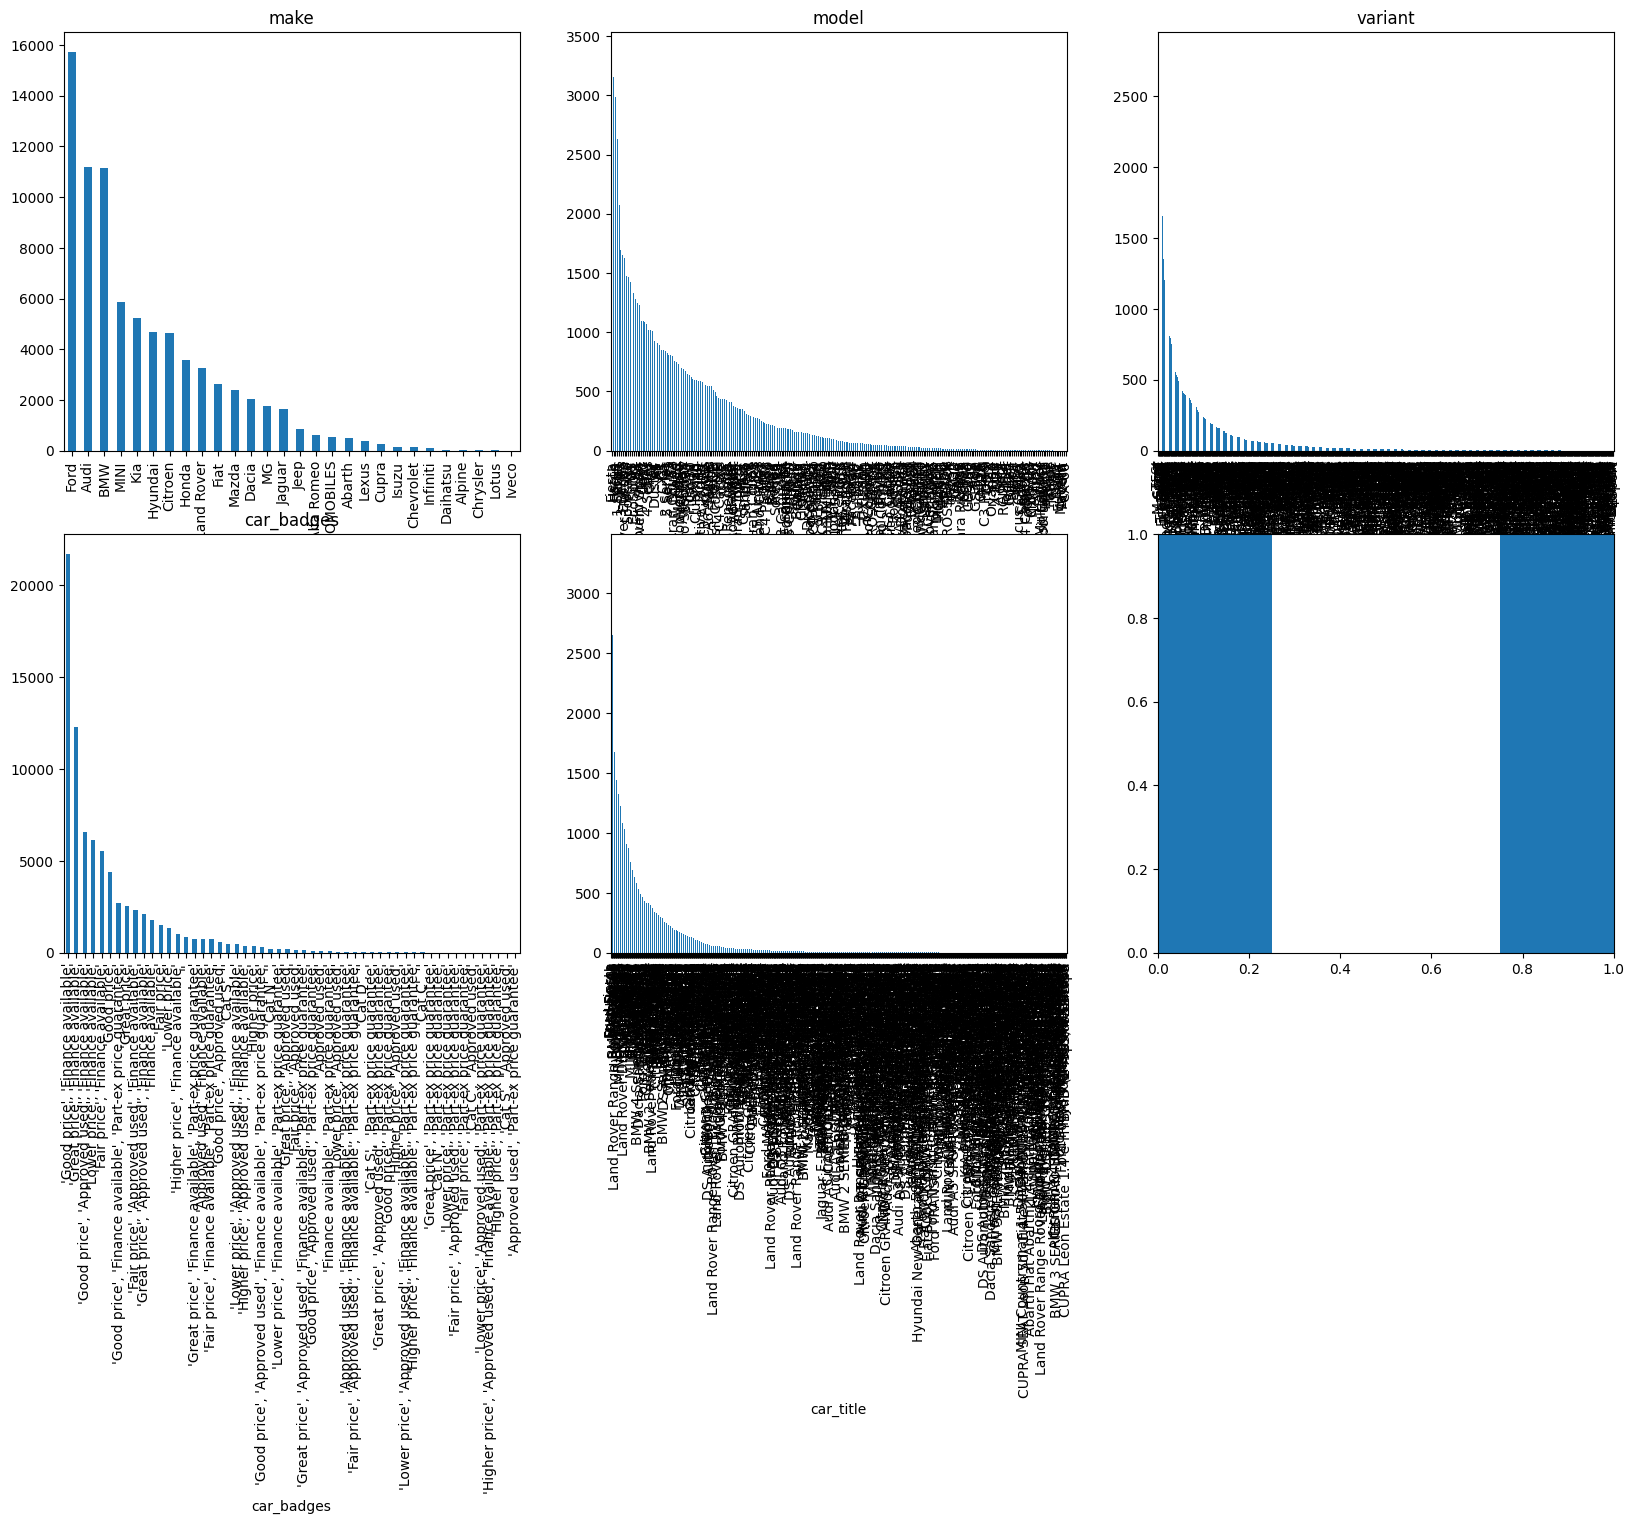

In [17]:
k=0
plt.figure(figsize=(20,25))
for col in train_data_imbalance:    
    k=k+1
    plt.subplot(4, 3,k)    
    train_data_imbalance[col].value_counts().plot(kind='bar')
    plt.title(col)

## Handle missing value

In [14]:
dataframe.columns[dataframe.isna().any()].tolist()

['model', 'car_attention_grabber', 'reg']

In [15]:
train_missings = dataframe.filter(
['variant',
 'car_badges',
 'body_type',
 'miles',
 'engine_size',
 'transmission',
 'feul_type',
 'num_owner'],axis=1)

In [16]:
print("Missing-value rate of train data:")
mis_val_train = train_missings.isnull().sum() / len(train_missings) * 100
print(mis_val_train)

Missing-value rate of train data:
engine_size    0.0
dtype: float64


We will drop all records that contain missing values

In [17]:
dataframe.dropna(inplace= True)

Checking missing data again

In [18]:
print("Number of columns that have NaN values are : " + str(len(dataframe.columns[dataframe.isna().any()].tolist())))

Number of columns that have NaN values are : 0



All NaN values have been handled ,so we have done this step

In [19]:
dataframe.shape

(262497, 10)

# Encoding labels

In [20]:

encoding_col = dataframe.select_dtypes(include='object')
encoding_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262497 entries, 8 to 409227
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   model                  262497 non-null  object
 1   car_title              262497 non-null  object
 2   car_sub_title          262497 non-null  object
 3   car_attention_grabber  262497 non-null  object
 4   car_specs              262497 non-null  object
 5   reg                    262497 non-null  object
dtypes: object(6)
memory usage: 14.0+ MB


In [21]:
dataframe.select_dtypes(include='object').columns.tolist()

['model',
 'car_title',
 'car_sub_title',
 'car_attention_grabber',
 'car_specs',
 'reg']

In [22]:
encoding_col = dataframe.select_dtypes(include='object')
le = LabelEncoder()
for col in encoding_col:
    le.fit(encoding_col[col].astype(str))
    dataframe[col] = le.transform(encoding_col[col].astype(str))
dataframe.info()



<class 'pandas.core.frame.DataFrame'>
Index: 262497 entries, 8 to 409227
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   model                  262497 non-null  int32  
 1   car_price              262497 non-null  int64  
 2   car_title              262497 non-null  int32  
 3   car_sub_title          262497 non-null  int32  
 4   car_attention_grabber  262497 non-null  int32  
 5   car_specs              262497 non-null  int32  
 6   year                   262497 non-null  float64
 7   reg                    262497 non-null  int32  
 8   engine_vol             262497 non-null  float64
 9   engine_size            262497 non-null  float64
dtypes: float64(3), int32(6), int64(1)
memory usage: 16.0 MB


In [23]:
encoding_col = dataframe.filter(
['car_title', 'body_type', 'transmission'],axis=1)
le = LabelEncoder()
for col in encoding_col:
    le.fit(encoding_col[col].astype(str))
    dataframe[col] = le.transform(encoding_col[col].astype(str))
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262497 entries, 8 to 409227
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   model                  262497 non-null  int32  
 1   car_price              262497 non-null  int64  
 2   car_title              262497 non-null  int32  
 3   car_sub_title          262497 non-null  int32  
 4   car_attention_grabber  262497 non-null  int32  
 5   car_specs              262497 non-null  int32  
 6   year                   262497 non-null  float64
 7   reg                    262497 non-null  int32  
 8   engine_vol             262497 non-null  float64
 9   engine_size            262497 non-null  float64
dtypes: float64(3), int32(6), int64(1)
memory usage: 16.0 MB


# Splitting data into train and test

In [24]:
y = dataframe['car_price']
X = dataframe.drop(columns=['car_price'],axis=1)

y.head()

8     24275
9     24275
10    25000
11    15649
12    15995
Name: car_price, dtype: int64

In [25]:
# 60% train ,20% validation ,20% test 
X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.2)
print(X_train.shape)
print(y_val.shape)


(167997, 9)
(42000,)


In [26]:
X_train.head()

,model,car_title,car_sub_title,car_attention_grabber,car_specs,year,reg,engine_vol,engine_size
4101,187,254,42703,65237,72167,2017.0,28,0.88,105.0
65152,0,124,23603,12672,32517,2014.0,8,2.00,143.0
116640,280,237,48648,67925,123110,2020.0,14,2.00,192.0
221464,173,579,31971,29941,14625,2011.0,5,2.00,163.0
67583,0,124,23948,18132,10807,2010.0,21,2.00,170.0


# Training the model

Bulding function needed to get metrics for val set

In [31]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {model.score(X_val, y_val)}')
    print("MAE:" , metrics.mean_absolute_error(y_val,model.predict(X_val)))
    print("MSE:" , metrics.mean_squared_error(y_val,model.predict(X_val)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,model.predict(X_val))))
    



In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 0.7703727676988679
Val score 0.7735834254660809
MAE: 3293.8698840488605
MSE: 20356882.547390312
RMSE: 4511.860209203108
R2: 0.7735834254660809


## Random forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train,y_train)
get_metrics(rf)


Train score 0.9969807515920256
Val score 0.9793405757746387
MAE: 815.4669800117789
MSE: 1857467.6934235927
RMSE: 1362.8894648589785
R2: 0.9793405757746387
